In [4]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
# Importing the dataset

diabetes = pd.read_csv('/content/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


###**Pre-processing**

In [7]:
# Information about the dataset

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Checking for null values

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# How to fill the null values in case we face any null values in the dataset

# Replacing it with numerical value (mean, median etc):

# diabetes['Age'].fillna(value = diabetes['Age'].mean(), inplace = True)
# diabetes['Insulin'].fillna(value = diabetes['Insulin'].median(), inplace = True)

# Replacing it with the required categorical or text value using bfill or ffill method:

# diabetes['Age'].fillna(method = 'bfill', inplace = True), bfill fills the null value from the next row
# diabetes['Age'].fillna(value = 'ffill', inplace = True), ffill fills the null value from the previous row

In [9]:
# Checking for the balance and the imbalance of the dataset

diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
# Balancing the data using upsampling and downsampling

from sklearn.utils import resample

# Upsampling of data
out_up = resample(diabetes[diabetes['Outcome'] == 1], replace = True, n_samples = 450)
out_up

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
635,13,104,72,0,0,31.2,0.465,38,1
332,1,180,0,0,0,43.3,0.282,41,1
577,2,118,80,0,0,42.9,0.693,21,1
99,1,122,90,51,220,49.7,0.325,31,1
111,8,155,62,26,495,34.0,0.543,46,1
...,...,...,...,...,...,...,...,...,...
19,1,115,70,30,96,34.6,0.529,32,1
360,5,189,64,33,325,31.2,0.583,29,1
110,3,171,72,33,135,33.3,0.199,24,1
425,4,184,78,39,277,37.0,0.264,31,1


In [12]:
# Downsampling of data

out_down = resample(diabetes[diabetes['Outcome'] == 0], n_samples = 450)
out_down

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
158,2,88,74,19,53,29.0,0.229,22,0
474,4,114,64,0,0,28.9,0.126,24,0
247,0,165,90,33,680,52.3,0.427,23,0
470,1,144,82,40,0,41.3,0.607,28,0
268,0,102,52,0,0,25.1,0.078,21,0
...,...,...,...,...,...,...,...,...,...
205,5,111,72,28,0,23.9,0.407,27,0
203,2,99,70,16,44,20.4,0.235,27,0
421,2,94,68,18,76,26.0,0.561,21,0
281,10,129,76,28,122,35.9,0.280,39,0


In [16]:
# Concatenation of the dataframes

result = [out_up, out_down]
diabetes_new = pd.concat(result)
diabetes_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
635,13,104,72,0,0,31.2,0.465,38,1
332,1,180,0,0,0,43.3,0.282,41,1
577,2,118,80,0,0,42.9,0.693,21,1
99,1,122,90,51,220,49.7,0.325,31,1
111,8,155,62,26,495,34.0,0.543,46,1
...,...,...,...,...,...,...,...,...,...
205,5,111,72,28,0,23.9,0.407,27,0
203,2,99,70,16,44,20.4,0.235,27,0
421,2,94,68,18,76,26.0,0.561,21,0
281,10,129,76,28,122,35.9,0.280,39,0


In [19]:
# Shuffling the dataset

from sklearn.utils import shuffle

diabetes_final = shuffle(diabetes_new)
diabetes_final

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
238,9,164,84,21,0,30.8,0.831,32,1
111,8,155,62,26,495,34.0,0.543,46,1
429,1,95,82,25,180,35.0,0.233,43,1
417,4,144,82,32,0,38.5,0.554,37,1
667,10,111,70,27,0,27.5,0.141,40,1
...,...,...,...,...,...,...,...,...,...
81,2,74,0,0,0,0.0,0.102,22,0
635,13,104,72,0,0,31.2,0.465,38,1
421,2,94,68,18,76,26.0,0.561,21,0
248,9,124,70,33,402,35.4,0.282,34,0


In [20]:
diabetes_final.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
238,9,164,84,21,0,30.8,0.831,32,1
111,8,155,62,26,495,34.0,0.543,46,1
429,1,95,82,25,180,35.0,0.233,43,1
417,4,144,82,32,0,38.5,0.554,37,1
667,10,111,70,27,0,27.5,0.141,40,1
122,2,107,74,30,100,33.6,0.404,23,0
746,1,147,94,41,0,49.3,0.358,27,1
471,0,137,70,38,0,33.2,0.170,22,0
656,2,101,58,35,90,21.8,0.155,22,0
437,5,147,75,0,0,29.9,0.434,28,0


###**Creating a new dataframe for plotting some results**

In [33]:
# Creating a new dataframe

data_2 = pd.DataFrame()
data_2

""


In [36]:
data_2['Insulin'] = [0, 495, 180, 100, 150]
data_2['Degree'] = ['No sugar', 'Very High Sugar', 'Very High Sugar', 'Normal', 'High Sugar']
data_2

,Insulin,Degree
0,0,No sugar
1,495,Very High Sugar
2,180,Very High Sugar
3,100,Normal
4,150,High Sugar


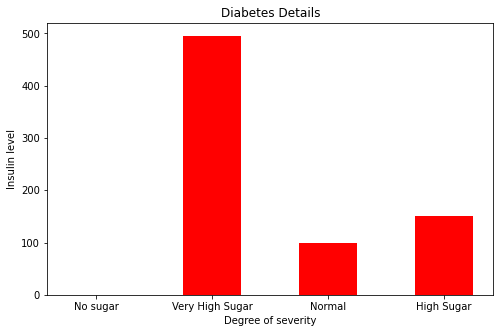

In [38]:
# Plotting the result

plt.figure(figsize = (8, 5))
plt.bar(data_2['Degree'], data_2['Insulin'], color = 'red', width = 0.5)
plt.xlabel('Degree of severity')
plt.ylabel('Insulin level')
plt.title('Diabetes Details')
plt.show();